In [1]:
#source: https://tproger.ru/translations/finding-books-python-opencv/

# загружаем пакеты 
import numpy as np
import cv2
import matplotlib.pylab as plt
%matplotlib inline

# загружаем изображение
image = cv2.imread("example.jpg")

In [2]:
#1 способ вывести изображение на экран

#cv2.imshow('im', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows(2)

In [4]:
# don't forget to download the image!
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)

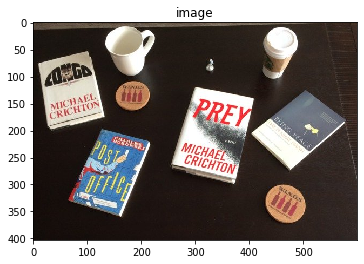

In [32]:
#третий способ вывести изображение на экран

b, g, r = cv2.split(image)
image = cv2.merge([r,g,b])
plt.imshow(image),plt.title('image')

plt.imshow(image)

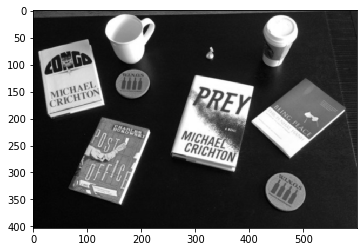

In [3]:
# переходим к чб изображению и размываем
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.GaussianBlur(gray, (3, 3), 0)
plt.imshow(gray, 'gray')

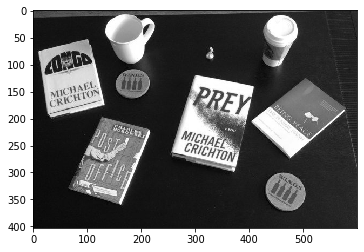

In [7]:
#другой способ перейти к чб изображению (тут без размытия)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, 'gray')

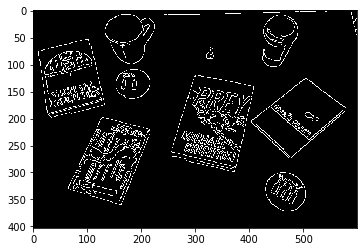

In [4]:
# распознавание контуров с помощью фильтра Canny
edged = cv2.Canny(gray, 10, 250)
plt.imshow(edged, 'gray')

#сохраним изображение
#cv2.imwrite("edged.jpg", edged)

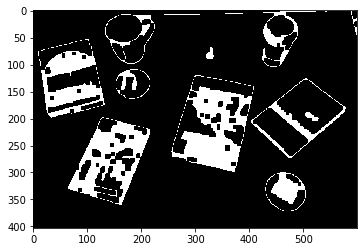

In [5]:
# создаём и применяем закрытие
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
#cv2.imwrite("closed.jpg", closed)
plt.imshow(closed, 'gray')

In [6]:
# ищем контуры в изображении и считаем количество объектов с 4 углами
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
total = 0

In [7]:
# цикл по контурам
for c in cnts:
    # аппроксимируем (сглаживаем) контур
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # если у контура 4 вершины
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1

In [10]:
print("На картинке {0} объектов с четырьмя вершинами".format(total)) 
cv2.imwrite("output.jpg", image)

На картинке 4 объектов с четырьмя вершинами


True